# Projeto WPT - Grupo 2
Arthur Tamm, Caio B√¥a, Gabriel Hermida e Pedro Civita

## Importando Bibliotecas

In [356]:
import numpy as np
from capacitor import Capacitor
from indutor import Indutor
import cmath
from numpy import sqrt, pi, linalg
import matplotlib.pyplot as plt

# Etapa 1

In [357]:
def freqResonancia(l, c):
    return 1/(2*pi*sqrt(l*c))

def CalcularTransformadorProjeto(v1, rc, r, l, m, c, f):
    w = 2*pi*f

    xl = w*l*1j
    xc = 1/(w*c*1j)
    xm = m*w*1j
    
    Z=np.array([[r+xl+xc, -xm],[-xm, xl+r+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return abs(I[0]), abs(I[1]), abs(V2)

def real(zeq):
    return abs(zeq)*np.cos(cmath.phase(zeq))

In [358]:
l  = 0.1
c = 1e-9

freqRes = freqResonancia(l, c)
print("Frequencia de ressonancia: ", freqRes)

v1 = 10

rc = 500
r = 1

k = 0.5
m = k*l

frequencies = np.arange(1000, 50000, 100)

values = {"i1": [], "i2": [], "v2": []}

Frequencia de ressonancia:  15915.494309189533


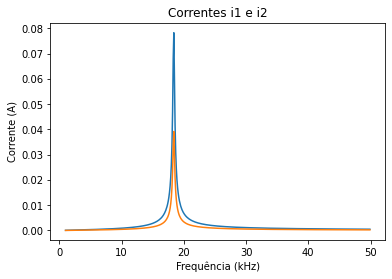

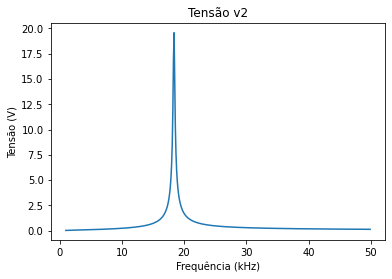

In [359]:
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, f)
    values["i1"].append(i1)
    values["i2"].append(i2)
    values["v2"].append(v2)
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"])

plt.title("Correntes i1 e i2")
plt.xlabel("Frequ√™ncia (kHz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tens√£o v2")
plt.xlabel("Frequ√™ncia (kHz)")
plt.ylabel("Tens√£o (V)")
plt.show()



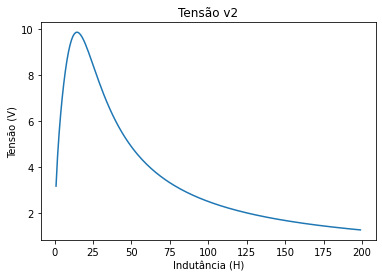

9.850014123963467


In [360]:
l_list = np.arange(1, 200, 1)
v2_list = []

for i in range(len(l_list)):
    l = l_list[i]
    fr = freqResonancia(l, c)
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, fr)
    v2_list.append(v2)

plt.plot(l_list, v2_list)
plt.title("Tens√£o v2")
plt.xlabel("Indut√¢ncia (H)")
plt.ylabel("Tens√£o (V)")
plt.show()

print(real(max(v2_list)))

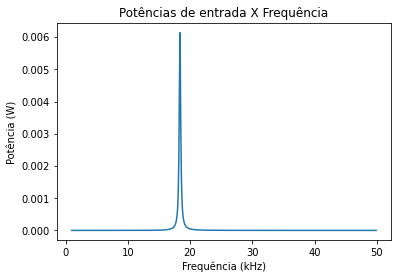

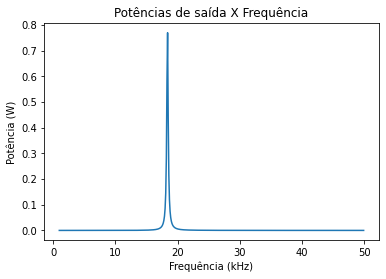

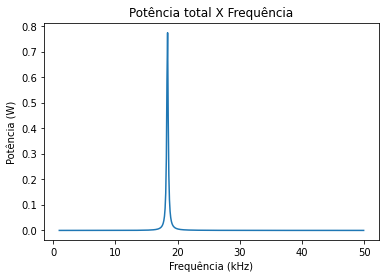

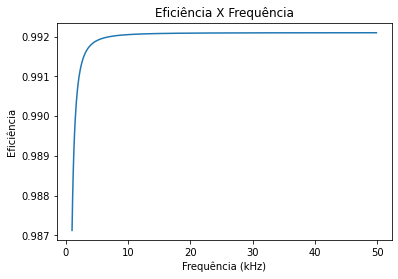

In [361]:
# Constru√ß√£o de gr√°ficos das pot√™ncias e da efici√™ncia em fun√ß√£o da frequ√™ncia

# Pot√™ncia de entrada
p1 = np.array(values["i1"])**2 * r

# Pot√™ncia de sa√≠da
p2 = np.array(values["i2"])**2 * rc

# Pot√™ncia total
pt = p1 + p2

# Efici√™ncia
eff = p2/pt

plt.plot(frequencies/1e3, p1)
plt.title("Pot√™ncias de entrada X Frequ√™ncia")
plt.xlabel("Frequ√™ncia (kHz)")
plt.ylabel("Pot√™ncia (W)")
plt.show()

plt.plot(frequencies/1e3, p2)
plt.title("Pot√™ncias de sa√≠da X Frequ√™ncia")
plt.xlabel("Frequ√™ncia (kHz)")
plt.ylabel("Pot√™ncia (W)")
plt.show()

plt.plot(frequencies/1e3, pt)
plt.title("Pot√™ncia total X Frequ√™ncia")
plt.xlabel("Frequ√™ncia (kHz)")
plt.ylabel("Pot√™ncia (W)")
plt.show()

plt.plot(frequencies/1e3, eff)
plt.title("Efici√™ncia X Frequ√™ncia")
plt.xlabel("Frequ√™ncia (kHz)")
plt.ylabel("Efici√™ncia")
plt.show()

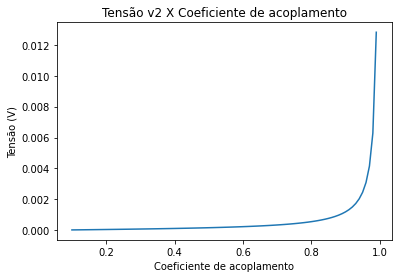

In [362]:
# Constru√ß√£o de um gr√°fico que relacione o valor de pico da tens√£o no secund√°rio (no resistor ùëÖùê∂) como coeficiente de acoplamento ùëò:

k_list = np.arange(0.1, 1, 0.01)
v2_list = []

for i in range(len(k_list)):
    k = k_list[i]
    m = k*l
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, freqRes)
    v2_list.append(v2)

plt.plot(k_list, v2_list)
plt.title("Tens√£o v2 X Coeficiente de acoplamento")
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tens√£o (V)")
plt.show()
